In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import gzip
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./notebookLabo1.ipynb
./train-labels-idx1-ubyte.gz
./train-images-idx3-ubyte.gz
./t10k-labels-idx1-ubyte.gz
./t10k-images-idx3-ubyte.gz
./.ipynb_checkpoints/notebookLabo1-checkpoint.ipynb


In [ ]:
# X son los atributos (imagenes)
# Y son etiquetas (labels)
     
def leer_imagenes(data):
    #Los primeros 4 bits son magic number
    #El magicNumber no lo necesitamos asi que lo saltamos
    magicNumber = int.from_bytes(data.read(4), "big")
    #Los siguientes 4 bits son el numero de imagenes
    num_images = int.from_bytes(data.read(4), "big")
    #Los siguientes 4 bits son el numero de filas por imagen
    rows = int.from_bytes(data.read(4), "big")
    #Los siguientes 4 bits son el numero de columnas por imagen
    cols = int.from_bytes(data.read(4), "big")
    #A partir de ahora estan todos los bits de los pixeles
    images = data.read()
    #Pasamos los datos a numpy
    x_ = np.frombuffer(images, dtype = np.uint8)
    #Pasamos el array a matrices por cada imagen
    x_ = x_.reshape((num_images, rows, cols))
    return x_
    
def leer_etiquetas(data):
    #Empezamos a leer despues del byte 8
    labels = data.read()[8:]
    y_ = np.frombuffer(labels, dtype = np.uint8)
    return y_
    

In [ ]:
for dirname, _, filenames in os.walk('.'):
    for f in filenames:
        if "train-images" in f:
            with gzip.open(f, "rb") as data:
                    x_train = leer_imagenes(data)
        elif "train-labels" in f:
            with gzip.open(f, "rb") as data:
                    y_train = leer_etiquetas(data)
        elif "t10k-images" in f:
            with gzip.open(f, "rb") as data:
                    x_test = leer_imagenes(data)
        elif "t10k-labels" in f:
            with gzip.open(f, "rb") as data:
                    y_test = leer_etiquetas(data)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Numero:  8


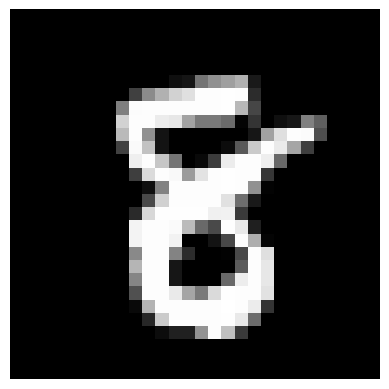

In [ ]:
def mostrar_numero(imagen):
    plt.imshow(imagen.squeeze(), cmap=plt.get_cmap("gray"))
    plt.axis("off")
    
# Creo un numero del 0 al 9
numeroRandom = np.random.randint(len(y_test))
print("Numero: ",y_test[numeroRandom])
mostrar_numero(x_test[numeroRandom]) 

In [ ]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

#Convertimos en DataFrame y arrays de Pandas
X_TRAIN = pd.DataFrame(x_train)
X_TEST = pd.DataFrame(x_test)
Y_TRAIN = pd.array(y_train)
Y_TEST = pd.array(y_test)

X_TRAIN.info()
X_TEST.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 7.5 MB


<BarContainer object of 10 artists>

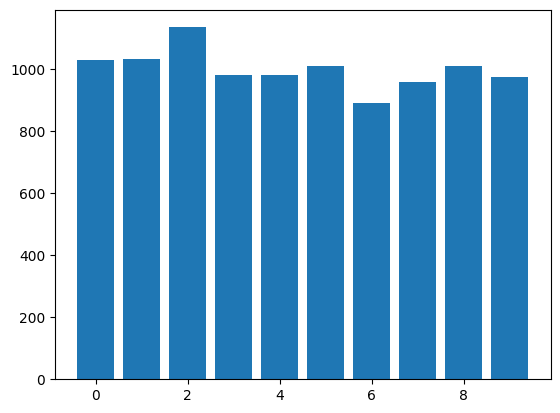

In [ ]:
# Muestro la frecuencia abs. de cada numero en la muestra Test
plt.bar([0,1,2,3,4,5,6,7,8,9], Y_TEST.value_counts())


***Clustering***

In [ ]:
from sklearn.decomposition import PCA

print('Dim originally: ',X_TRAIN.shape)
# Reducir las dimensiones para visualizarlas: PCA
pca = PCA(n_components=2)
pca.fit(X_TRAIN)
# Cambio de base a dos dimensiones PCA 
X_train_PCAspace = pca.transform(X_TRAIN)
print('Dim after PCA: ',X_train_PCAspace.shape)


Dim originally:  (60000, 784)
Dim after PCA:  (60000, 2)


In [11]:
from sklearn.manifold import TSNE 
tsne = TSNE().fit_transform(X_train_PCAspace)

/home/zireael/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/zireael/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [12]:
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters)
kmeans.fit(X_train_PCAspace)
# get the cluster-labels for each instance in the X_train_PCAspace
kmeansLabels = kmeans.predict(X_train_PCAspace)

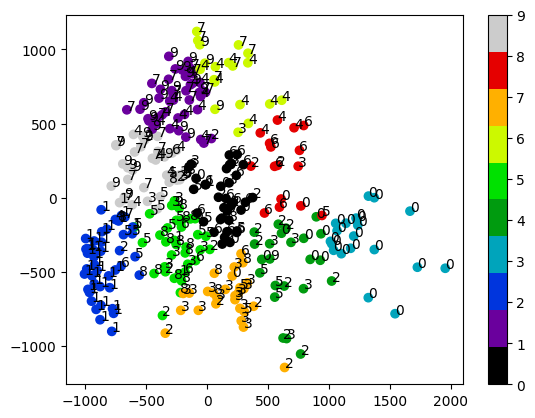

In [13]:
# Dibujar sólo unas pocas instancias
samples = 300
# Dibujar los puntos en el espacio, color: cluster, etiqueta-numérica: clase
# Color del punto: cluster
sc = plt.scatter(X_train_PCAspace[:samples,0],X_train_PCAspace[:samples,1], cmap=plt.cm.get_cmap('nipy_spectral', 10),c=kmeansLabels[:samples])
plt.colorbar()
# Etiqueta numérica: clase 
for i in range(samples):
    plt.text(X_train_PCAspace[i,0],X_train_PCAspace[i,1], y_train[i])
    

In [31]:
# TO.DO
# Visualizar, aleatoriamente, 4 imágenes de cada cluster

# Por cada numero del 0 al 9 quiero almacenar 4 imágenes
#X_train_PCAspace
# Creo un diccionario que por cada numero tiene 4 imágenes

import random

dictCuatro_imagenes = {}
for i in range(0,9):
    dictCuatro_imagenes[i] = []
terminado = False
# Terminados es una lista para anotar los clusteres de los que ya he cogido 4 imagenes
terminados = [False for i in range(10)]


while not terminado:
    
    pca_posicion = random.randint(0, len(X_train_PCAspace))

    # Añadir maximo 4 imagenes por cada numero al diccionario
    if len(dictCuatro_imagenes[y_train[pca_posicion]]) < 4:
        dictCuatro_imagenes[y_train[pca_posicion]].append(X_train_PCAspace[pca_posicion])
    # Si ya se han añadido 4 imagenes a un numero, lo marco para no tener que
    # recorrer todo X_train_PCAspace cuando ya tenga 4 imagenes por cada cluster
    else:
        terminados[i] = True

    # Si ya tengo todo lo necesario termino el bucle
    terminado = True
    for i in range(0,9):
        if terminados[i] == False: terminado = False

    print(f"PCA_POSICION: {pca_posicion}")
    
for key in dictCuatro_imagenes:
    f"{dictCuatro_imagenes[key]}"


# Este algoritmo de arriba es una mierda porque encima tengo que coger imagenes aleatorias



{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: []}
PCA_POSICION: 10421
PCA_POSICION: 27058
PCA_POSICION: 59842
PCA_POSICION: 30132
PCA_POSICION: 47505
PCA_POSICION: 49682
PCA_POSICION: 3671
PCA_POSICION: 48472
PCA_POSICION: 21544
PCA_POSICION: 59937
PCA_POSICION: 35180
PCA_POSICION: 26218
PCA_POSICION: 42646
PCA_POSICION: 22559
PCA_POSICION: 46980
PCA_POSICION: 7697
PCA_POSICION: 35911
PCA_POSICION: 20232
PCA_POSICION: 12786
PCA_POSICION: 46191
PCA_POSICION: 22260
PCA_POSICION: 19348
PCA_POSICION: 2193
PCA_POSICION: 26659
PCA_POSICION: 34572
PCA_POSICION: 23753
PCA_POSICION: 58192


KeyError: 9

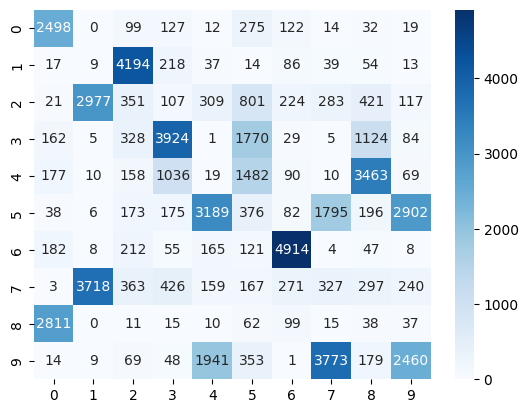

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# El atributo generado por K-means es int, hay que pasarlos a string
to_string = lambda x : str(x)
# Obtener matriz de confusión Class to clustering eval
cm = confusion_matrix(np.vectorize(to_string)(kmeansLabels), np.vectorize(to_string)(y_train))
# Mapa de calor a partir de la matriz de confusion
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")